# Convoluciones 1D
En este ejercicio implementaremos convoluciones en 1D utilizando numpy. El objetivo es comprender el funcionamiento de estas operaciones para luego poder utilizarlas de manera mas eficaz al definir redes neuronales.

Comenzaremos implementando convoluciones 1D sin stride o salto. Luego agregaremos la habilidad de especificar el stride, y finalmente el padding o relleno. Por último, tendrás que determinar el valor de los parámetros para filtrar una señal con ruido.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def equal_array(verdadero,calculado):
    if verdadero.shape != calculado.shape:
        print("Incorrecto: Los vectores tienen tamaños distintos")
        print("verdadero.shape = ", verdadero.shape)
        print("calculado.shape = ", calculado.shape)
        return
    equals=np.all(verdadero==calculado)
    if equals:
        print("Correcto: Los arreglos son iguales.")
    else:
        print("Incorrecto: Los arreglos no son iguales.")
        print("Debió obtener:")
        print(verdadero)
        print("Obtuvo:")
        print(calculado)

def impar(x): 
    return x%2 == 1


## 1. Convoluciones 1D simples
En este ejercicio deberas implementar convoluciones para señales de 1D. Esto quiere decir que el vector de entrada `x` tiene una sola dimensión, así como el vector de pesos `w`.

Ejemplo: 
![](conv1d/conv1d_slow.gif)


In [18]:
def conv1d_simple(w, x):
    nx, = x.shape #Longitud del vector de entrada
    d, = w.shape #Longitud del vector de pesos
    assert impar(d), "La longitud de w debe ser un número impar"
    ny = nx-d+1 #Longitud del vector de salida
    y = np.zeros(ny) #Vector de salida
    
    ## TODO : COMPLETAR
    ## Calcular la convolución y guardarla en el vector Y
    ## Pista: Usar un for y la variable ny
    for i in range(0,ny):
        y[i] = np.dot(x[i:i+d],w)

     ## FIN TODO    
    
    return y

w = np.array([1, 0, -1])
x = np.array ([5 , 0, 2, -1, 3, 0, 2])
y_verdadero = np.array([3, 1 , -1, -1, 1])
y = conv1d_simple(w, x)

equal_array(y_verdadero, y)



Correcto: Los arreglos son iguales.


## 2. Convoluciones 1D con stride
En este ejercicio deberás agregar la capacidad de hacer convoluciones con stride mayores a 1. Ten en cuenta que ahora el vector resultante va a ser más corto si el stride es mayor a 1.

Ejemplo con `stride = 2`: 
![](conv1d/conv1dstride_slow.gif)

In [19]:
def conv1d_stride(w, x, stride):
    nx, = x.shape #Longitud del vector de entrada
    d, = w.shape #Longitud del vector de pesos
    assert impar(d), "La longitud de w debe ser un número impar"
    ny = int((nx-d)/stride)+1 #Longitud del vector de salida
    y = np.zeros(ny) #Vector de salida
    
     ## TODO : COMPLETAR
    #Calcular la convolución y guardarla en el vector Y
    for i in range(0,ny):
        if i == 0 :
            y[i] = np.dot(x[i:i+d],w)
        elif i > 0 & i+stride-1+d < nx-2 :
            y[i] = np.dot(x[stride*i:stride*i+d],w)
    
    y = np.int_(y)
     ## FIN TODO    
    
    return y

w = np.array([1, 0, -1])
x = np.array ([5 , 0, 2, -1, 3, 0, 2])
y_verdadero = np.array([3, -1, 1])
stride = 2
y = conv1d_stride(w, x, stride)

equal_array(y_verdadero, y)



Correcto: Los arreglos son iguales.


## 3. Padding para conservar la dimensión
Como habrás notado al aplicar la convolución en los bordes el tamaño del vector de salida es menor que el de entrada, aún cuando `stride = 1`.

Por ejemplo, sí el tamaño de `w` es 3, la salida tendrá dos elementos menos, ya que se pierde uno a la izquierda de `x` y otro a la derecha del mismo. 

Sí el tamaño de `w` es 5 entonces la salida tendrá 4 elementos menos, dos a la izquierda de `x` y dos a la derecha.

Una manera de evitar esto es rellenar el vector de entrada con 0 a la izquierda y a la derecha. Este proceso se llama agregar *padding*. Eligiendo el tamaño del relleno con cuidado podemos lograr que el tamaño del vector de salida sea igual que el de entrada.

Implementa la función `pad1d` que rellena un vector de 1D con `0` a izquierda y derecha.


In [20]:
def pad1d(x, pad_size):
    x_relleno = np.zeros(x.shape[0]+2*pad_size)
    
    ##TODO: COMPLETAR
    ##x_relleno debe ser igual que x
    ##pero agregando pad_size ceros a izquierda y derecha
    for i in range(0,x.shape[0]):
        x_relleno[i+pad_size] = x[i]    
    
    x_relleno = np.int_(x_relleno)
    ##FIN TODO

    return x_relleno

x = np.array([1.0, 2, 3])
x_relleno = pad1d(x, 2)
x_relleno_verdadero = np.array([0, 0, 1.0, 2, 3, 0, 0])

equal_array(x_relleno_verdadero, x_relleno)


Correcto: Los arreglos son iguales.


## 4. Convoluciones con padding

Implementa la función `conv1d` para que soporte el parametro `pad_size`. Antes de realizar la convolución, debe llamar a la función `pad1d` para generar un `x` relleno. 

![](conv1d/conv1dpad_slow.gif)

In [21]:
def conv1d(w, x, stride, pad_size):
    
    ##TODO: IMPLEMENTAR
    ##RELLENAR A X ANTES DE HACER LA CONVOLUCION
    x_relleno = pad1d(x, pad_size)
    
    ##FIN TODO
    
    return conv1d_stride(w, x_relleno, stride)

w = np.array([1, 0, -1])
x = np.array ([5 , 0, 2, -1, 3, 0, 2])
y_verdadero = np.array([0, 3, 1, -1, -1, 1, 0])
y = conv1d(w, x, stride = 1, pad_size = 1)

equal_array(y_verdadero, y)


Correcto: Los arreglos son iguales.


## 5. Jugando con convoluciones 1D
Ahora que has implementado correctamente las convoluciones de 1D, utilizaremos esa operación para intentar filtrar una señal. Tu objetivo será encontrar un vector `w` que elimine la información de alta frecuencia, es decir las pequeñas oscilaciones. 

Text(0.5, 1.0, 'Ideal (El filtrado debería verse así)')

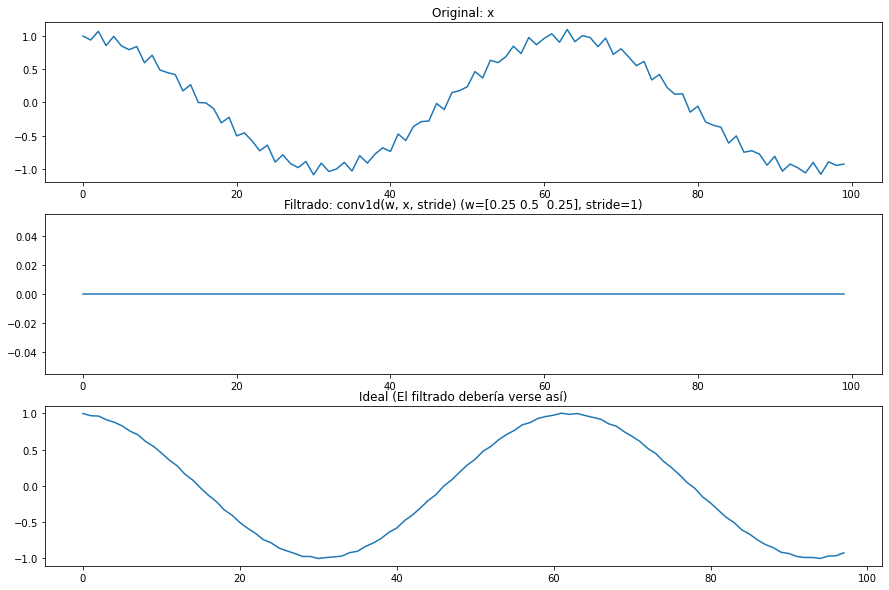

In [22]:
##MODIFICA LAS VARIABLES STRIDE Y W PARA FILTRAR LA SEÑAL. 
##PRUEBA CAMBIANDO TANTO LOS VALORES DE W COMO SU TAMAÑO,
##PERO RECUERDA QUE SIEMPRE DEBE TENER UNA CANTIDAD IMPAR DE VALORES
stride= 1
w= np.array([0.25,0.5,0.25])
##FIN MODIFICACION

ix= np.arange(100)
x= np.cos(ix*0.1)+np.sin(ix*10)*0.1
y= conv1d(w, x, stride, pad_size = 1)

f,(ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15, 10))
ax1.plot(ix, x)
ax1.set_title("Original: x")

ax2.plot(np.arange(len(y)), y)
ax2.set_title(f"Filtrado: conv1d(w, x, stride) (w={w}, stride={stride})")

y_ideal = np.load("ideal.npy")

ax3.plot(np.arange(len(y_ideal)), y_ideal)
ax3.set_title("Ideal (El filtrado debería verse así)")

